Exemple
Demo1 - single-variate regression
Problemă: Ce îi poate face pe oameni fericiți?
Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de libertate, etc.

Folsind datele aferente anului 2017 link, să se realizeze o predicție a gradului de fericire în funcție:

doar de Produsul intern brut

Metodologie pentru aplicarea GD pentru estimarea fericirii

Tipuri de regresie:   univariata – flow similar cu lab-ul precedent:

Algoritm de regresie:

- Live: SGDRegressor din sklearn link
- Live: SGDRegressor propriu

Pasi in rezolvare:

- plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)
- impartire date pe train si test
- invatare model (cu tool de GD sau cu cod propriu)
- plot rezultate
- calcul metrici de performanta (eroarea)

In [1]:
import warnings; warnings.simplefilter('ignore')
import csv
import matplotlib.pyplot as plt
import numpy as np

Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

In [3]:
# Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that output variable (y) can be calculated from a linear combination of the input variables (x).
# Univariate Linear Regression is a linear regression that has only one input parameter and one output label.

# consider the following regression problem:
# estimate how happiness is influenced by gross domestic product (GDP) per capita. Use 2017 data from ![here](https://www.kaggle.com/unsdsn/world-happiness#2017.csv)

# load data and consider a single feature (Economy..GDP.per.capita) and the output to be estimated (happiness)


def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


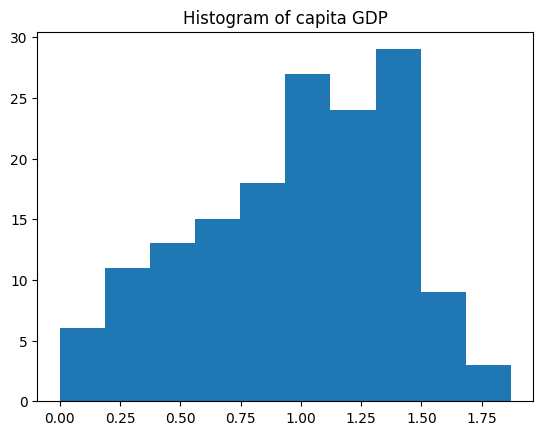

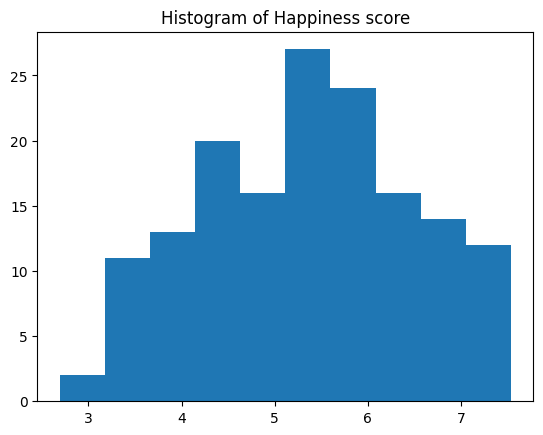

In [4]:
# see how the data looks (plot the histograms associated to input data - GDP feature - and output data - happiness)

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, "capita GDP")
plotDataHistogram(outputs, "Happiness score")

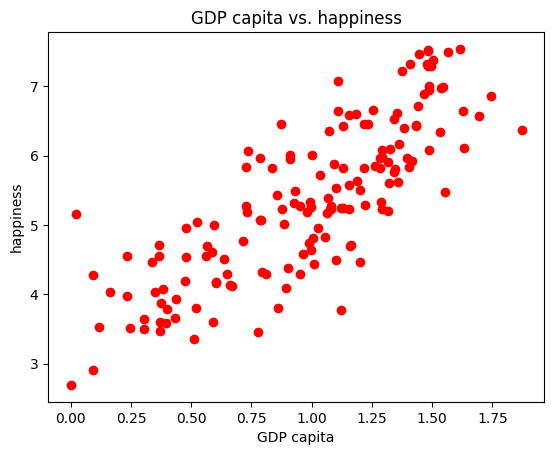

In [5]:
# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)

plt.plot(inputs, outputs, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

Pasul 2 - impartire date pe train si test

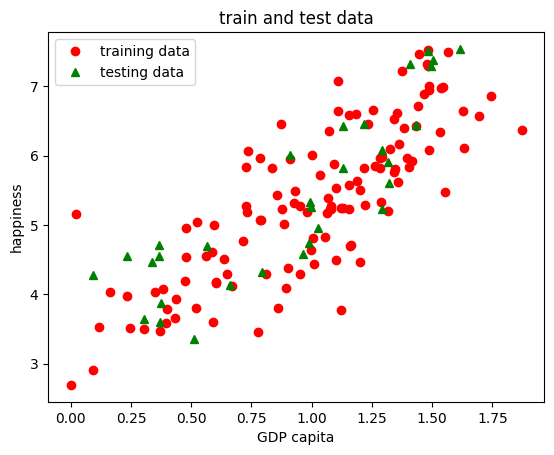

In [6]:
# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for training the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to  model and we may check how accurate are model predictions.

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'testing data')     #test data are plotted by green and a triangle sign
plt.title('train and test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

Pasul 3 - invatare model (cu tool sau cod propriu)

In [7]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
# Prediction step: used the trained model to estimate the output for a new input


# training data preparation (the sklearn linear model requires as input training data as noSamples x noFeatures array; in the current case, the input must be a matrix of len(trainInputs) lineas and one columns (a single feature is used in this problem))
xx = [[el] for el in trainInputs]

# using sklearn
from sklearn import linear_model
# model initialisation
regressor = linear_model.SGDRegressor(alpha = 0.01, max_iter = 100)
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_[0], regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  2.760178119826493  +  2.5488940031775456  * x


In [8]:
# using developed code
from SGD import MySGDRegression

# model initialisation
regressor = MySGDRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  3.1994285956915123  +  2.1487678365481915  * x


Pasul 4 - plot rezultate (model invatat, predictii)

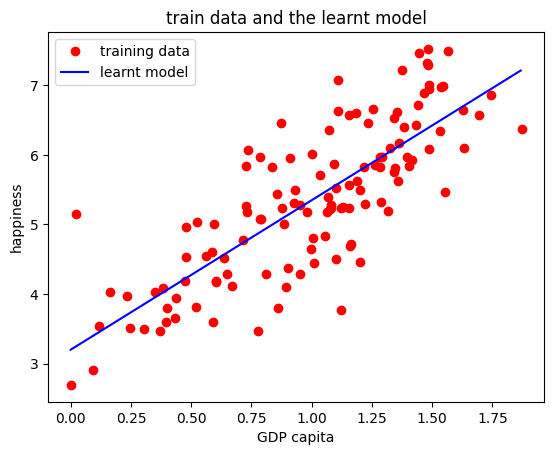

In [9]:
# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

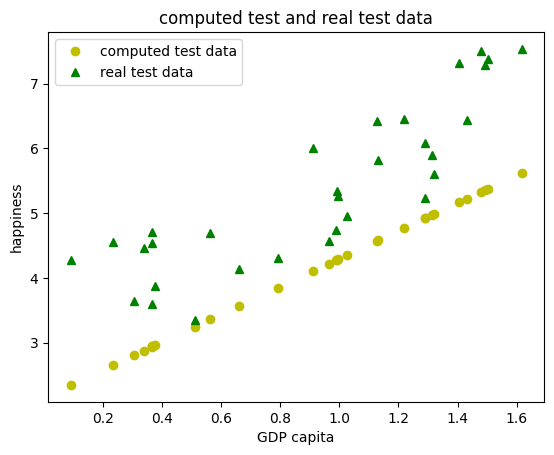

In [10]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
# makes predictions for test data (by tool)
computedTestOutputs = regressor.predict([[x] for x in testInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(testInputs, computedTestOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed test and real test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

Pasul 5 - calcul metrici de performanta (eroarea)

In [11]:
#compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

# by using sklearn
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  1.9008773201208433
prediction error (tool):   1.9008773201208433


Toti pasii impreuna

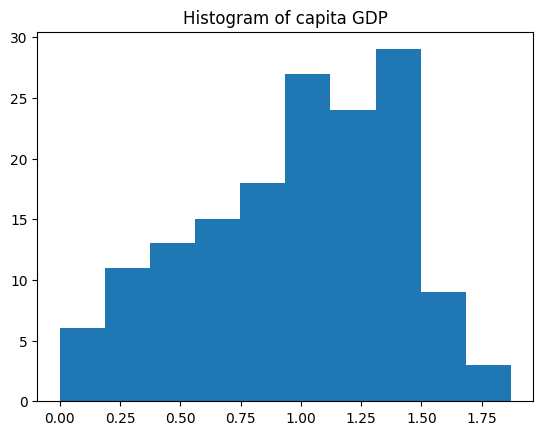

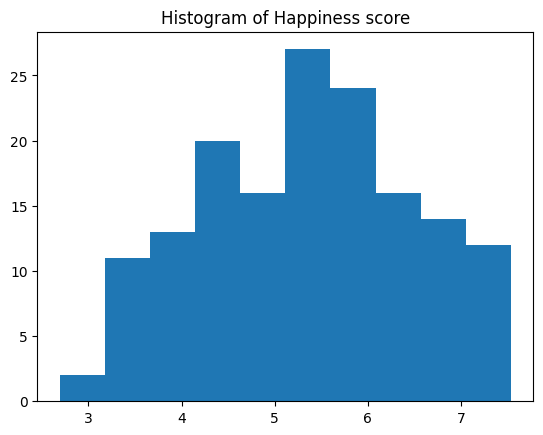

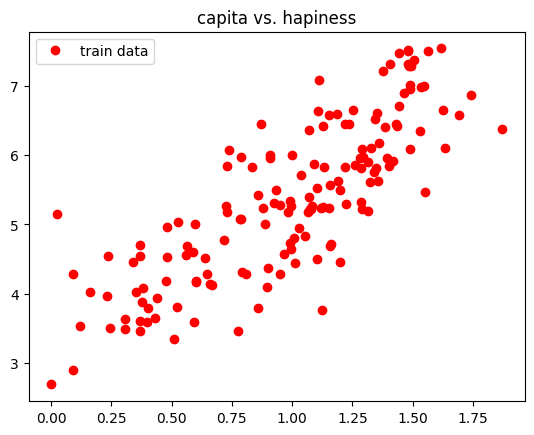

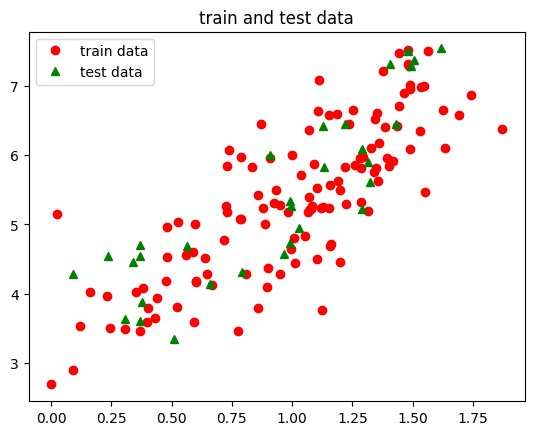

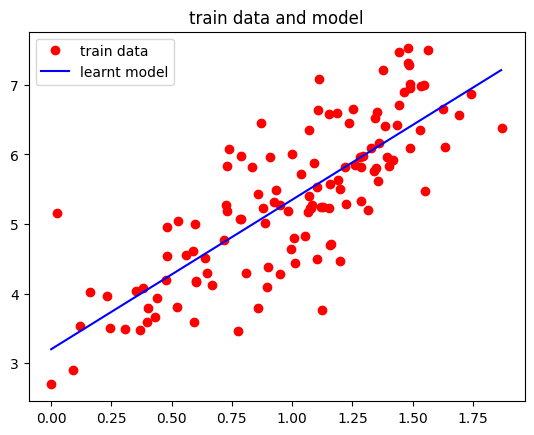

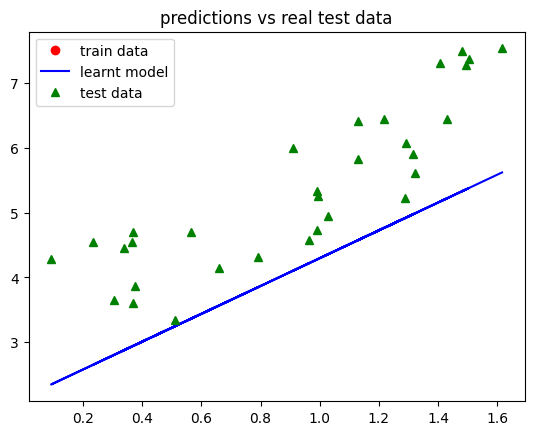

prediction error (manual):  1.9008773201208433
prediction error (tool):  1.9008773201208433


In [13]:
# put all steps togheter

def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

def univariateRegression():
    import os

    crtDir =  os.getcwd()
    filePath = os.path.join(crtDir, 'data', '2017.csv')

    inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

    plotDataHistogram(inputs, 'capita GDP')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
    plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

    # split data into training data (80%) and testing data (20%)
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    plotData(trainInputs, trainOutputs, [], [], testInputs, testOutputs, "train and test data")

    # training step
    xx = [[el] for el in trainInputs]
    # regressor = linear_model.SGDRegressor(max_iter =  10000)
    regressor = MySGDRegression()
    regressor.fit(xx, trainOutputs)
    w0, w1 = regressor.intercept_, regressor.coef_[0]

    # plot the model
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref]
    plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")

    #makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el for el in testInputs]
    #makes predictions for test data (by tool)
    computedTestOutputs = regressor.predict([[x] for x in testInputs])
    plotData([], [], testInputs, computedTestOutputs, testInputs, testOutputs, "predictions vs real test data")

    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print("prediction error (tool): ", error)

univariateRegression()